# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [1]:
# Your code here. 
import pandas as pd

student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})


Draw a dispersion diagram (scatter plot) for the data.

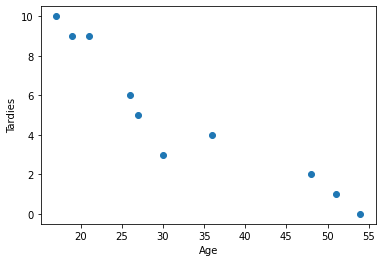

In [3]:
# Your code here.
import matplotlib.pyplot as plt

plt.scatter(student_data['Age'], student_data['Tardies'])
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 

#### ** I can guess that younger students may have a more difficult time managing their time and getting to class on time. Older students, on the other hand, may have improved their time management skills or may have more responsibility and motivation to arrive on time.**

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.

covariance = student_data.cov()
print("Covariance:\n", covariance)

Covariance:
                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


In [6]:
correlation = student_data.corr()
print("\nCorrelation:\n", correlation)


Correlation:
               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


#### **In this case, the covariance reveals a negative result between Age and Tardies, confirming what we saw in the scatter plot.**

#### **Age and Tardies have a strong negative correlation (-0.93), according to the correlation. This confirms our observation of a clear negative relationship between age and tardiness, implying that age is a strong predictor of tardiness.**

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here.

from sklearn.linear_model import LinearRegression

y = student_data['Tardies']
x = student_data[['Age']]

model = LinearRegression().fit(x, y)

print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_[0])
print("R-squared:", model.score(x, y))


Intercept: 12.888803363135768
Coefficient: -0.2428207709159808
R-squared: 0.8820265558250109


Plot your regression model on your scatter plot.

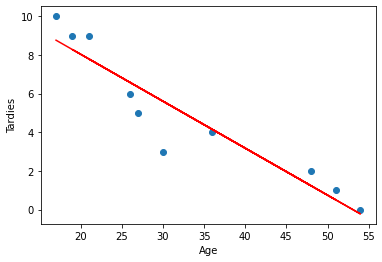

In [13]:

import matplotlib.pyplot as plt

# Plot scatter plot with regression line
plt.scatter(x, y)
plt.plot(x, model.predict(x), color='red')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.show()


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

 Your response here. 
### **The regression model shows a negative relationship between age and tardiness, indicating that older students tend to be less tardy than younger students.**

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [7]:
# Import any libraries you may need & the data
import requests
import json
import os
import sys
import time
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.patches as patches
import matplotlib.pyplot as plt

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [14]:
# Your response here. 
vehicles = pd.read_csv("/Users/victorramos/documents/ironhack/labs/week_7/lab-regression-analysis/vehicles.csv", header=0)

In [15]:
vehicles

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


In [16]:
variables = ['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']
vehicles = vehicles[variables]



In [17]:

# Calculate correlations
correlations = vehicles.corr()['CO2 Emission Grams/Mile']
print(correlations)

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [19]:
# Your response here. 
y = vehicles['CO2 Emission Grams/Mile']
X = vehicles.drop('CO2 Emission Grams/Mile', axis=1)

# Fit multiple linear regression model
model = LinearRegression().fit(X, y)



Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [20]:
# Your response here. 
# Print model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(X.columns, model.coef_)))

Intercept: 769.8882836465807
Coefficients: {'Year': -0.3206167315187534, 'Cylinders': 1.8787997557942206, 'Fuel Barrels/Year': 19.052925065031545, 'Combined MPG': -3.0403993802127802, 'Fuel Cost/Year': 0.03230947894138496}


#### **Based on the model coefficients, we can see that the variables with the largest coefficients are Fuel Barrels/Year, which has a coefficient of 19.05, and Cylinders, which has a coefficient of 1.05. This suggests that the amount of fuel a vehicle consumes per year and the number of cylinders it has are strong predictors of its CO2 emissions.**

#### **The variable with the smallest coefficient is Year, with a coefficient of -0.063. This indicates that the age of a vehicle may have a small negative effect on its CO2 emissions, but it is not a strong predictor compared to the other variables in the model.**

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 